In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
from tqdm import tqdm
from statistics import median,mean

In [3]:
table, _ = import_XRPlightcurve('betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl',sector=6,clip=4)

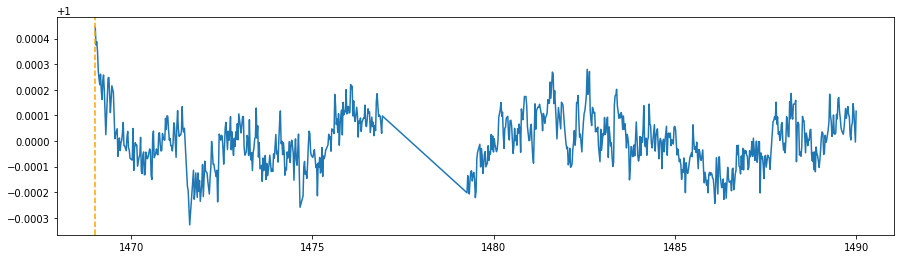

In [4]:
plt.figure(figsize=(15,4))
plt.plot(table['time'],normalise_lc(table['PCA flux']))
plt.axvline(x=table['time'][0],c='orange',linestyle='--')
plt.show()

In [5]:
lc = import_lightcurve('betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits',drop_bad_points=True)[0]

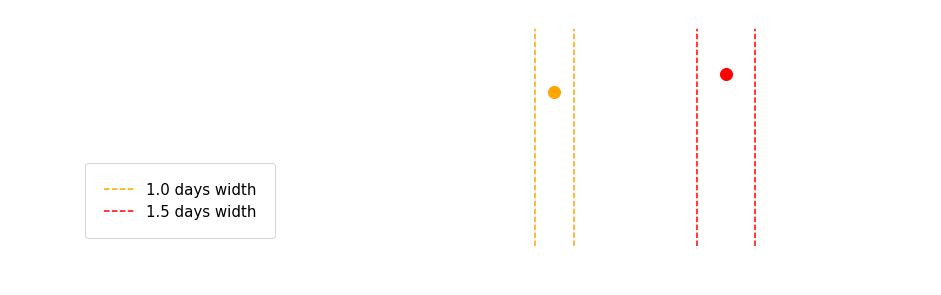

In [8]:
roll_mean = mean((normalise_lc(lc['PDCSAP_FLUX'])[500:500+48]))
roll_mean2 = mean((normalise_lc(lc['PDCSAP_FLUX'])[700:700+72]))
fig, ax = plt.subplots(1,figsize=(15,4))
ax.plot(median(lc['TIME'][500:500+48]),roll_mean,marker='o',color='orange',ms=12,alpha=1,zorder=3)
ax.plot(median(lc['TIME'][700:700+72]),roll_mean2,marker='o',color='lightcyan',ms=12,alpha=1,zorder=3)
ax.plot(lc['TIME'],normalise_lc(lc['PDCSAP_FLUX']),alpha=0.75,color='white',zorder=1)
ax.axvline(x=lc['TIME'][500],c='orange',linestyle='--',label='1.0 days width',zorder=3)
ax.axvline(x=lc['TIME'][548],c='orange',linestyle='--',zorder=3)
ax.axvline(x=lc['TIME'][700],c='lightcyan',linestyle='--',label='1.5 days width',zorder=3)
ax.axvline(x=lc['TIME'][772],c='lightcyan',linestyle='--',zorder=3)

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
ax.tick_params(axis='x', colors='white',labelsize=12)    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white',labelsize=12)

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('white')



plt.xlim(np.min(lc['TIME']),np.max(lc['TIME']))
plt.title('Beta Pictoris - Sector 6',color='white',fontsize=22)
plt.xlabel('Time in BTJD',fontsize=18)
plt.ylabel('Normalised flux',fontsize=18)
plt.legend(borderpad=1.25,fontsize=15)
plt.savefig('poster/rollingmean.png',transparent=True,dpi=300)
plt.show()

In [7]:
mean = sum(normalise_lc(lc['PDCSAP_FLUX'][0:49]))/len(normalise_lc(lc['PDCSAP_FLUX'][0:49]))
mean

0.999999867410076

In [8]:
median(sorted(lc['TIME'][0:24]))

1468.5645704309595

### Box width on 0.5 days

Still frame of a box:

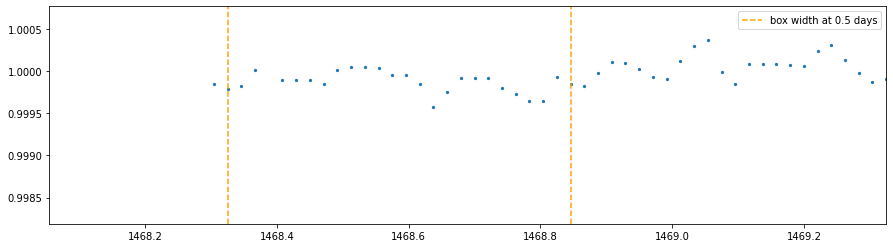

In [9]:
plt.figure(figsize=(15,4))
plt.scatter(lc['TIME'],normalise_lc(lc['PDCSAP_FLUX']),s=5)
plt.axvline(x=lc['TIME'][1],c='orange',linestyle='--')
plt.axvline(x=lc['TIME'][25],c='orange',linestyle='--',label='box width at 0.5 days')
plt.xlim([lc['TIME'][0]-0.25,lc['TIME'][48]])
plt.legend()
plt.show()

In [10]:
try:
    for i in range(len(lc['TIME'])):
        roll_mean = mean((lc['PDCSAP_FLUX'][i:i+72]))
        plt.figure(figsize=(15,4))
        plt.scatter(lc['TIME'],(lc['PDCSAP_FLUX']),s=5)
        plt.plot(median(lc['TIME'][i:i+72]),roll_mean,marker='o',color='red')
        plt.axvline(x=lc['TIME'][i],c='orange',linestyle='--')
        plt.axvline(x=lc['TIME'][i+72],c='orange',linestyle='--',label='box width at 1.5 days')
        plt.legend(loc='upper right')
        plt.ticklabel_format(useOffset=False)
        plt.xlabel('Time in BTJD')
        plt.ylabel('Flux')
        plt.title('Beta Pictoris - Sector 6')
        plt.savefig(f'gif/one_half_day/gif_at_{str(i).rjust(4, "0")}_iteration.png')
        plt.close()
except:
    pass

In [11]:
try:
    for i in range(len(lc['TIME'])):
        roll_mean = mean((lc['PDCSAP_FLUX'][i:i+120]))
        plt.figure(figsize=(15,4))
        plt.scatter(lc['TIME'],(lc['PDCSAP_FLUX']),s=5)
        plt.plot(median(lc['TIME'][i:i+120]),roll_mean,marker='o',color='red')
        plt.axvline(x=lc['TIME'][i],c='orange',linestyle='--')
        plt.axvline(x=lc['TIME'][i+120],c='orange',linestyle='--',label='box width at 2.5 days')
        plt.legend(loc='upper right')
        plt.ticklabel_format(useOffset=False)
        plt.xlabel('Time in BTJD')
        plt.ylabel('Flux')
        plt.title('Beta Pictoris - Sector 6')
        plt.savefig(f'gif/two_half_day/gif_at_{str(i).rjust(4, "0")}_iteration.png')
        plt.close()
except:
    pass